# 3. 신경망

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-활성화함수" data-toc-modified-id="1.-활성화함수-1">1. 활성화함수</a></span><ul class="toc-item"><li><span><a href="#1.1-계단-함수-구현하기" data-toc-modified-id="1.1-계단-함수-구현하기-1.1">1.1 계단 함수 구현하기</a></span></li><li><span><a href="#1.2-계단-함수의-그래프" data-toc-modified-id="1.2-계단-함수의-그래프-1.2">1.2 계단 함수의 그래프</a></span></li><li><span><a href="#1.3-시그모이드-함수-구현하기" data-toc-modified-id="1.3-시그모이드-함수-구현하기-1.3">1.3 시그모이드 함수 구현하기</a></span></li><li><span><a href="#1.4-ReLU-함수" data-toc-modified-id="1.4-ReLU-함수-1.4">1.4 ReLU 함수</a></span></li></ul></li><li><span><a href="#2.-다차원-배열의-계산" data-toc-modified-id="2.-다차원-배열의-계산-2">2. 다차원 배열의 계산</a></span><ul class="toc-item"><li><span><a href="#2.1-numpy-기본" data-toc-modified-id="2.1-numpy-기본-2.1">2.1 numpy 기본</a></span></li><li><span><a href="#2.2-행렬의-곱" data-toc-modified-id="2.2-행렬의-곱-2.2">2.2 행렬의 곱</a></span></li><li><span><a href="#2.3-신경망에서의-행렬곱" data-toc-modified-id="2.3-신경망에서의-행렬곱-2.3">2.3 신경망에서의 행렬곱</a></span></li><li><span><a href="#2.4.-3층-신경망-구현하기" data-toc-modified-id="2.4.-3층-신경망-구현하기-2.4">2.4. 3층 신경망 구현하기</a></span></li></ul></li><li><span><a href="#3.-출력층-설계하기" data-toc-modified-id="3.-출력층-설계하기-3">3. 출력층 설계하기</a></span></li></ul></div>

## 1. 활성화함수

### 1.1 계단 함수 구현하기

In [1]:
import numpy as np

In [46]:
# 계단함수
def step_function(x):
    return 1 if x > 0 else 0

In [55]:
for i in range(-2, 3):
    print('step_function({:>2}): {}'.format(i,step_function(i)))

step_function(-2): 0
step_function(-1): 0
step_function( 0): 0
step_function( 1): 1
step_function( 2): 1


In [60]:
# 이렇게 구현하면 배열에서는 오류
try:
    print(step_function(np.array([n for n in range(-2, 3)])))
except:
    print('오류')

오류


In [61]:
def step_function(x):
    y = x>0
    return y.astype(np.int)

In [62]:
# 배열에서도 잘 됨.
try:
    print(step_function(np.array([n for n in range(-2, 3)])))
except:
    print('오류')

[0 0 0 1 1]


* 넘파이 이해하기

In [68]:
x = np.array([-1.0, -8.3, 0, 1.2, 5.7])
y = x > 0
y

array([False, False, False,  True,  True])

In [70]:
# bool to int
(y).astype(np.int)

array([0, 0, 0, 1, 1])

### 1.2 계단 함수의 그래프

In [71]:
import matplotlib.pyplot as plt

In [72]:
def step_function(x): return np.array(x>0, dtype=np.int)

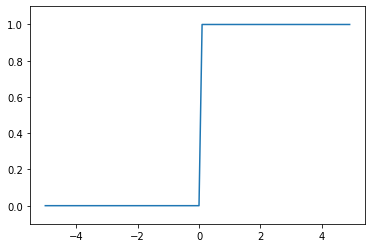

In [79]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 1.3 시그모이드 함수 구현하기

In [80]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [81]:
x = np.array([-1.0, 1.0, 2.0])
y = sigmoid(x)

* numpy의 브로드캐스트 기능 덕에 배열도 잘 처리하는데, 브로드캐스트 복습해보자.

In [83]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [84]:
1.0/t

array([1.        , 0.5       , 0.33333333])

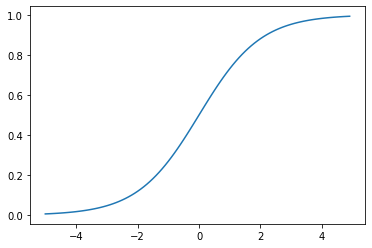

In [89]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

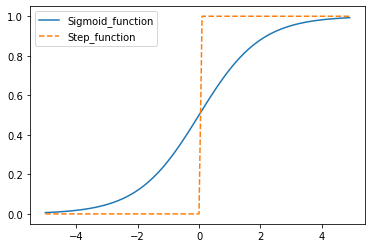

In [96]:
x = np.arange(-5, 5, 0.1)
y_sigmoid = sigmoid(x)
y_step = step_function(x)
plt.plot(x, y_sigmoid, label='Sigmoid_function')
plt.plot(x, y_step, '--', label = 'Step_function')
plt.legend()
plt.show()

### 1.4 ReLU 함수

In [97]:
def ReLU(x):
    return np.maximum(0, x)

In [100]:
ReLU(np.array([0, 1, 0.2, -7]))

array([0. , 1. , 0.2, 0. ])

## 2. 다차원 배열의 계산

### 2.1 numpy 기본

In [117]:
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [118]:
np.ndim(A)

1

In [119]:
A.shape

(4,)

In [107]:
A.shape[0]

4

In [113]:
A = np.array([[[1,2,], [2,3], [3,4]], [[1,2,], [2,3], [3,4]]])

In [114]:
A

array([[[1, 2],
        [2, 3],
        [3, 4]],

       [[1, 2],
        [2, 3],
        [3, 4]]])

In [115]:
A.shape

(2, 3, 2)

In [116]:
A.ndim

3

In [120]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [121]:
np.ndim(B)

2

In [123]:
B.shape

(3, 2)

### 2.2 행렬의 곱

In [124]:
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [125]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [126]:
A.dot(B)

array([[19, 22],
       [43, 50]])

In [127]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [128]:
np.dot(B, A)

array([[23, 34],
       [31, 46]])

In [129]:
C = np.array([[1,2,3], [4,5,6]])

In [130]:
C.shape

(2, 3)

In [131]:
np.dot(A, C)

array([[ 9, 12, 15],
       [19, 26, 33]])

In [133]:
A = np.array([[1, 2,], [3, 4], [5, 6]])
B = np.array([7, 8])
np.dot(A, B)

array([23, 53, 83])

In [134]:
B.shape

(2,)

### 2.3 신경망에서의 행렬곱

In [135]:
X = np.array([1, 2])
X.shape

(2,)

In [136]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [137]:
W.shape

(2, 3)

In [138]:
Y = np.dot(X, W)

In [144]:
print(Y)

[ 5 11 17]


### 2.4. 3층 신경망 구현하기

In [145]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [147]:
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [149]:
Z1 = sigmoid(A1)

In [156]:
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [157]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [158]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [166]:
def identify_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3)

In [167]:
print(Y)

[0.31682708 0.69627909]


In [169]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3. 출력층 설계하기

In [170]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [172]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [173]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [174]:
def softmax(x):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [175]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

C:\Users\samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [176]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [177]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [178]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)    # 오버플로 방지
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y
    

In [179]:
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])